In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import pickle

In [56]:
with open('../data/CIFAR10/batches.meta', 'rb') as f:
    meta = pickle.load(f)
    
class_names = dict(zip(list(range(10)), meta['label_names']))

In [208]:
transform_list = transforms.Compose([transforms.ToTensor()])

train = datasets.CIFAR10('../data/CIFAR10/train', train=True, download=True, transform=transform_list)
test = datasets.CIFAR10('../data/CIFAR10/test', train=False, download=True, transform=transform_list)

Files already downloaded and verified
Files already downloaded and verified


In [209]:
trainset = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

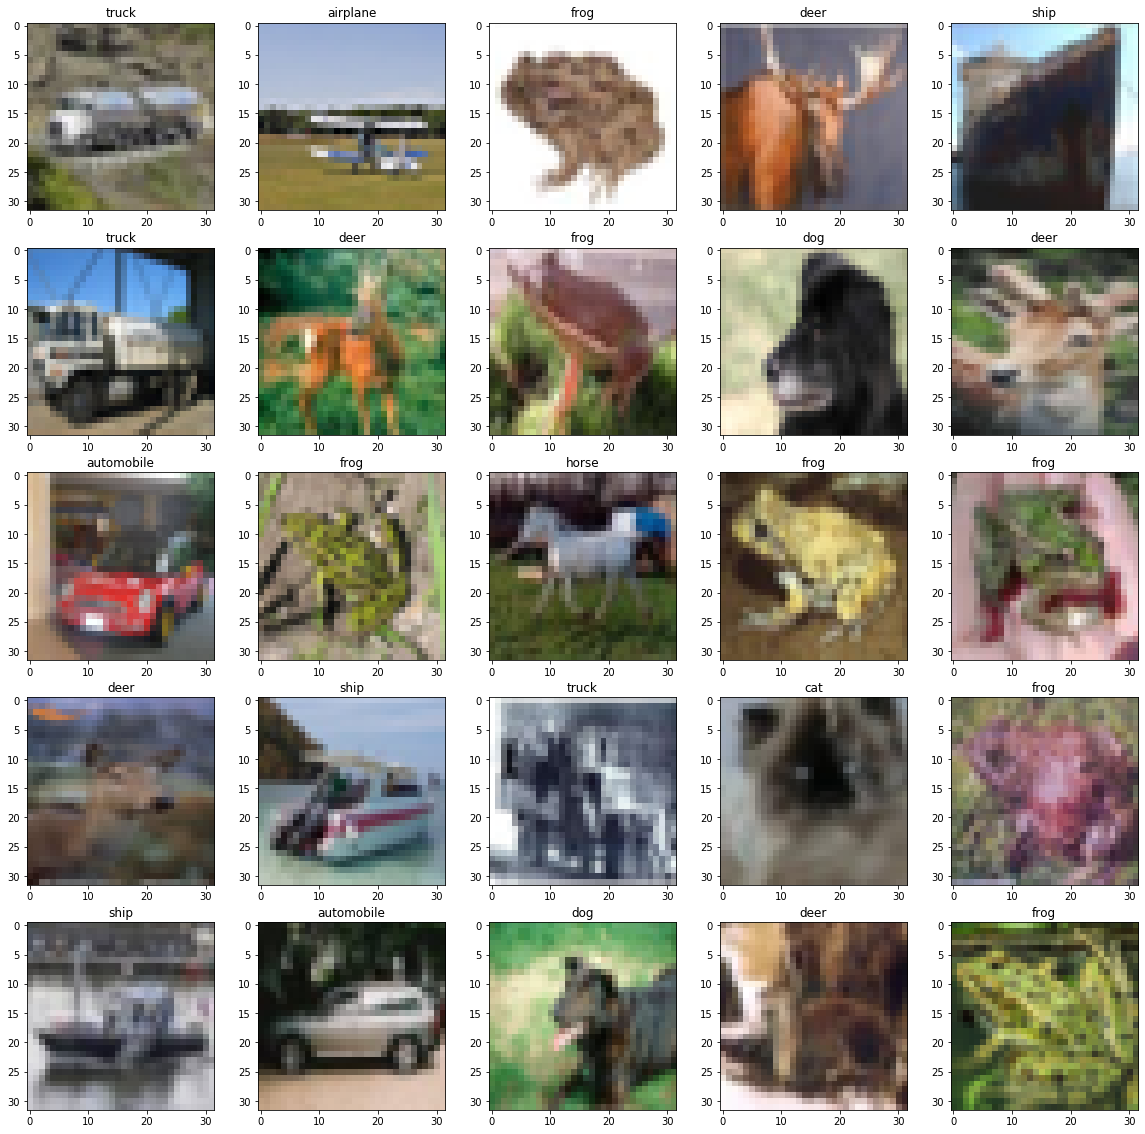

In [210]:
batch, labels = next(iter(trainset))

f = plt.figure(figsize=(20, 20))

for i in range(25):
    ax = f.add_subplot(5, 5, i+1)
    plt.imshow(batch[i].permute(1,2,0))
    plt.title(class_names[int(labels[i])])

In [204]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 16, (3, 3), padding=1)
        self.conv2 = nn.Conv2d(16, 32, (3, 3), padding=1)
        
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        
        self.conv3 = nn.Conv2d(32, 32, (3, 3), padding=1)
        self.conv4 = nn.Conv2d(32, 64, (3, 3), padding=1)
        
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)        
        
        self.fc1 = nn.Linear(64*8*8, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = torch.nn.LeakyReLU(0.1)(x)
        x = self.conv2(x)
        x = torch.nn.LeakyReLU(0.1)(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        
        x = self.conv3(x)
        x = torch.nn.LeakyReLU(0.1)(x)
        x = self.conv4(x)
        x = torch.nn.LeakyReLU(0.1)(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        
        x = x.view(-1, 64*8*8)
        
        x = self.fc1(x)
        x = nn.LeakyReLU(0.1)(x)
        x = nn.dropout3(x)
        x = self.fc2(x)
        x = nn.Softmax(dim=1)(x)
        
        return x

In [203]:
model = Model().cuda()
epochs = 10

optimizer = optim.Adam(model.parameters(), 1e-4)
criterion = nn.CrossEntropyLoss()

for e in range(epochs):
    
    model.train()
    
    for i, (batch, labels) in enumerate(trainset):
        
        optimizer.zero_grad()
        output = model(batch.cuda())
        
        loss = criterion(output, labels.cuda())
        loss.backward()
        
        optimizer.step()
        
        if i % 100 == 0:
            print(loss)
        
    '''else:
        model.eval()
        with torch.no_grad():
            for batch, labels in testset:
                output = model()'''

tensor(2.3025, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2249, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1706, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1852, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1349, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0998, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1429, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0889, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1068, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0314, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0485, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1342, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0126, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0033, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.9966, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0191, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0476, device='cuda:0', grad_fn=<NllLossBackward